In [1]:
import numpy as np
from qiskit import *
from qiskit.test.mock import FakeGuadalupe
import mthree
import matplotlib.pyplot as plt

In [2]:
backend = FakeGuadalupe()
qubits = [1, 4, 7, 10, 12, 13, 14, 11, 8, 5, 3, 2]

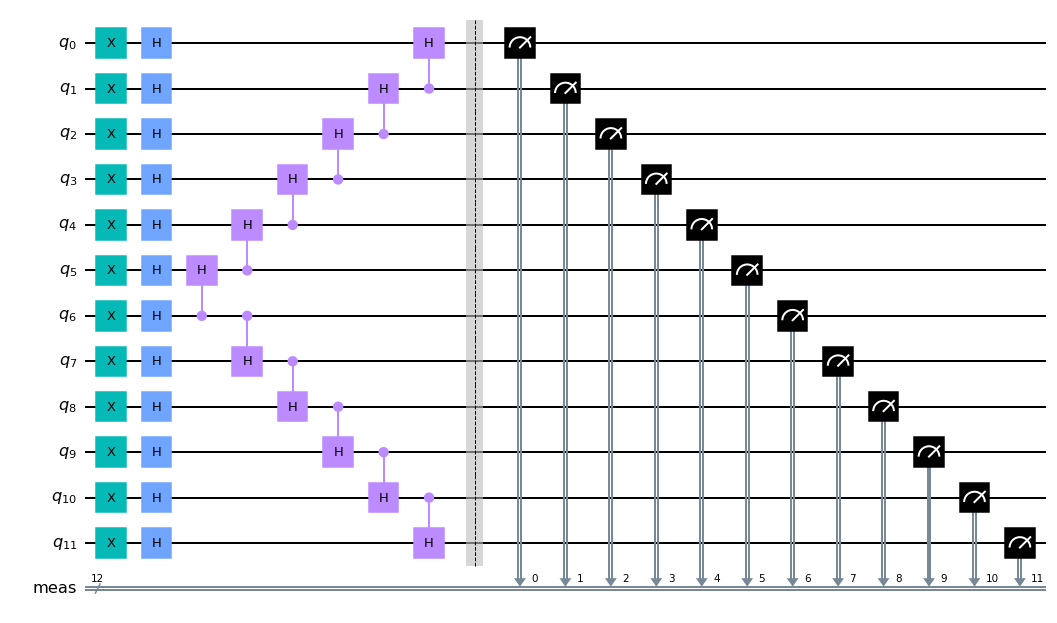

In [3]:
N = 12
qc = QuantumCircuit(N)

qc.x(range(0, N))
qc.h(range(0, N))

for kk in range(N//2, 0, -1):
    qc.ch(kk, kk-1)
for kk in range(N//2, N-1):
    qc.ch(kk, kk+1)
qc.measure_all()
qc.draw('mpl')

In [4]:
mit = mthree.M3Mitigation(backend)
mit.cals_from_system(qubits)

In [5]:
trans_circs = transpile([qc]*10, backend, initial_layout=qubits)
raw_counts = backend.run(trans_circs).result().get_counts()

In [6]:
raw_exp = []
for cnts in raw_counts:
    raw_exp.append(mthree.utils.expval(cnts))

In [7]:
%%debug
quasis = mit.apply_correction(raw_counts, qubits, method="iterative", return_mitigation_overhead=True)

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> <string>(2)<module>()

ipdb> s
--Call--
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(375)apply_correction()
    373             raise M3Error('Faulty qubits detected: {}'.format(bad_list))
    374 
--> 375     def apply_correction(self, counts, qubits, distance=None,
    376                          method='auto',
    377                          max_iter=25, tol=1e-5,

ipdb> ll
--> 375     def apply_correction(self, counts, qubits, distance=None,
    376                          method='auto',
    377                          max_iter=25, tol=1e-5,
    378                          return_mitigation_overhead=False,
    379                          details=False):
    380         """Applies correction to given counts.
    381 
    382         Parameters:
    383             counts (dict, list): Input counts dict or list of dicts.
    384             qubits (array_like): Qubits 

ipdb> b 419
Breakpoint 1 at /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py:419
ipdb> c
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(419)apply_correction()
    417             raise M3Error('Length of counts does not match length of qubits.')
    418 
1-> 419         quasi_out = []
    420 
    421         for idx, cnts in enumerate(counts):

ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(421)apply_correction()
1   419         quasi_out = []
    420 
--> 421         for idx, cnts in enumerate(counts):
    422 
    423             quasi_out.append(

ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(423)apply_correction()
    421         for idx, cnts in enumerate(counts):
    422 
--> 423             quasi_out.append(
    424                 self._apply_correction(cnts, qubits=qubits[idx],


ipdb> l
    430                             )
    431 
    432         if not given_list:
    433             return quasi_out[0]
    434         return QuasiCollection(quasi_out)
    435 
    436     def _apply_correction(self, counts, qubits, distance=None,
    437                           method='auto',
    438                           max_iter=25, tol=1e-5,
    439                           return_mitigation_overhead=False,
    440                           details=False):

ipdb> s
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(425)apply_correction()
    423             quasi_out.append(
    424                 self._apply_correction(cnts, qubits=qubits[idx],
--> 425                                        distance=distance,
    426                                        method=method,
    427                                        max_iter=max_iter, tol=tol,

ipdb> s
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-pac

ipdb> b 509
Breakpoint 2 at /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py:509
ipdb> c
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(509)_apply_correction()
    507             return mit_counts
    508 
2-> 509         elif method == 'iterative':
    510             iter_count = np.zeros(1, dtype=int)
    511 

ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(510)_apply_correction()
    508 
2   509         elif method == 'iterative':
--> 510             iter_count = np.zeros(1, dtype=int)
    511 
    512             def callback(_):

ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(512)_apply_correction()
    510             iter_count = np.zeros(1, dtype=int)
    511 
--> 512             def callback(_):
    513                 iter_count[0] += 1
    514 

ipdb> iter_count
array([0])
ip

ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(624)_matvec_solver()
    622         """
    623         cals = self._form_cals(qubits)
--> 624         M = M3MatVec(dict(counts), cals, distance)
    625         L = spla.LinearOperator((M.num_elems, M.num_elems),
    626                                 matvec=M.matvec, rmatvec=M.rmatvec)

ipdb> cals
array([0.99110921, 0.02360026, 0.00889079, 0.97639974, 0.98058065,
       0.0434672 , 0.01941935, 0.9565328 , 0.99383545, 0.03469849,
       0.00616455, 0.96530151, 0.97116089, 0.09366862, 0.02883911,
       0.90633138, 0.99413045, 0.02341715, 0.00586955, 0.97658285,
       0.99569702, 0.03689575, 0.00430298, 0.96310425, 0.99515788,
       0.01868693, 0.00484212, 0.98131307, 0.99508667, 0.03501383,
       0.00491333, 0.96498617, 0.99318441, 0.02547201, 0.00681559,
       0.97452799, 0.99018351, 0.03121948, 0.00981649, 0.96878052,
       0.99472046, 0.02412923, 0.00527954, 0.97587077, 0.99

ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(635)_matvec_solver()
    633         P = spla.LinearOperator((M.num_elems, M.num_elems), precond_matvec)
    634         vec = counts_to_vector(M.sorted_counts)
--> 635         out, error = spla.gmres(L, vec, tol=tol, atol=tol, maxiter=max_iter,
    636                                 M=P, callback=callback)
    637         if error:

ipdb> tol
1e-05
ipdb> max_iter
25
ipdb> P
<167x167 _CustomLinearOperator with dtype=float64>
ipdb> L
<167x167 _CustomLinearOperator with dtype=float64>
ipdb> callback
ipdb> p callback
None
ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(636)_matvec_solver()
    634         vec = counts_to_vector(M.sorted_counts)
    635         out, error = spla.gmres(L, vec, tol=tol, atol=tol, maxiter=max_iter,
--> 636                                 M=P, callback=callback)
    637         if error:
    638           

ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(640)_matvec_solver()
    638             raise M3Error('GMRES did not converge: {}'.format(error))
    639 
--> 640         gamma = None
    641         if return_mitigation_overhead:
    642             gamma = ainv_onenorm_est_iter(M, tol=tol, max_iter=max_iter)

ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(641)_matvec_solver()
    639 
    640         gamma = None
--> 641         if return_mitigation_overhead:
    642             gamma = ainv_onenorm_est_iter(M, tol=tol, max_iter=max_iter)
    643 

ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(642)_matvec_solver()
    640         gamma = None
    641         if return_mitigation_overhead:
--> 642             gamma = ainv_onenorm_est_iter(M, tol=tol, max_iter=max_iter)
    643 
    644         quasi = vector_to_quasiprobs

ipdb> c
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/utils.py(285)vector_to_quasiprobs()
    281     idx = 0
    282     for key in counts:
    283         out_counts[key] = vec[idx]
    284         idx += 1
3-> 285     return QuasiDistribution(out_counts)

ipdb> s
--Call--
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/classes.py(133)__init__()
    131     """A dict-like class for representing quasi-probabilities.
    132     """
--> 133     def __init__(self, data, shots=None, mitigation_overhead=None):
    134         """A dict-like class for representing quasi-probabilities.
    135 

ipdb> ll
--> 133     def __init__(self, data, shots=None, mitigation_overhead=None):
    134         """A dict-like class for representing quasi-probabilities.
    135 
    136         Parameters:
    137             data (dict): Input data.
    138             shots (int): Number shots taken to form quasi-distribution.
    139       

ipdb> n
--Return--
({'00000000101...5645849422671}, 2.149194519613108)
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(647)_matvec_solver()
    645         if details:
    646             return quasi, M.get_col_norms(), gamma
--> 647         return quasi, gamma
    648 
    649     def readout_fidelity(self, qubits=None):

ipdb> quasi
{'000000001011': 0.0009218425788692213, '000000001111': 0.001939567275740026, '000000011110': 0.000907372489283992, '000000011111': 0.0018714400200233554, '000000111011': 0.0017513597313359643, '000000111111': 0.0072550466371634195, '000100111111': 0.0007797777072706322, '000110111111': 0.0019975756243947713, '001100111111': 0.0009218246460327151, '001110011111': 0.0019512445752569538, '001111111011': 0.0009595339591760428, '010000110111': 0.0009650218029166916, '010111111111': 0.0009313822829300521, '011000001111': 0.0008152313850199556, '011000111111': 0.00053381218152591, '011100011111': 0.0014334895377815

ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(538)_apply_correction()
    536                                                     return_mitigation_overhead)
    537             mit_counts.shots = shots
--> 538             if gamma is not None:
    539                 mit_counts.mitigation_overhead = gamma * gamma
    540             return mit_counts

ipdb> ll
    436     def _apply_correction(self, counts, qubits, distance=None,
    437                           method='auto',
    438                           max_iter=25, tol=1e-5,
    439                           return_mitigation_overhead=False,
    440                           details=False):
    441         """Applies correction to given counts.
    442 
    443         Parameters:
    444             counts (dict): Input counts dict.
    445             qubits (array_like): Qubits on which measurements applied.
    446             distance (int): Distance to correct for.

ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(539)_apply_correction()
    537             mit_counts.shots = shots
    538             if gamma is not None:
--> 539                 mit_counts.mitigation_overhead = gamma * gamma
    540             return mit_counts
    541 

ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(540)_apply_correction()
    538             if gamma is not None:
    539                 mit_counts.mitigation_overhead = gamma * gamma
--> 540             return mit_counts
    541 
    542         else:

ipdb> n
--Return--
{'00000000101...5645849422671}
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(540)_apply_correction()
    538             if gamma is not None:
    539                 mit_counts.mitigation_overhead = gamma * gamma
--> 540             return mit_counts
    541 
    542         else:

ipdb> n


ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(421)apply_correction()
1   419         quasi_out = []
    420 
--> 421         for idx, cnts in enumerate(counts):
    422 
    423             quasi_out.append(

ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(423)apply_correction()
    421         for idx, cnts in enumerate(counts):
    422 
--> 423             quasi_out.append(
    424                 self._apply_correction(cnts, qubits=qubits[idx],
    425                                        distance=distance,

ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(424)apply_correction()
    422 
    423             quasi_out.append(
--> 424                 self._apply_correction(cnts, qubits=qubits[idx],
    425                                        distance=distance,
    426                                        method=method

ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(464)_apply_correction()
    462 
    463         # If distance is None, then assume max distance.
--> 464         num_bits = len(qubits)
    465         num_elems = len(counts)
    466         if distance is None:

ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(465)_apply_correction()
    463         # If distance is None, then assume max distance.
    464         num_bits = len(qubits)
--> 465         num_elems = len(counts)
    466         if distance is None:
    467             distance = num_bits

ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(466)_apply_correction()
    464         num_bits = len(qubits)
    465         num_elems = len(counts)
--> 466         if distance is None:
    467             distance = num_bits
    468 

ipdb> ll
    436     def _apply_correction(

ipdb> c 2
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(509)_apply_correction()
    507             return mit_counts
    508 
2-> 509         elif method == 'iterative':
    510             iter_count = np.zeros(1, dtype=int)
    511 

ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(510)_apply_correction()
    508 
2   509         elif method == 'iterative':
--> 510             iter_count = np.zeros(1, dtype=int)
    511 
    512             def callback(_):

ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(512)_apply_correction()
    510             iter_count = np.zeros(1, dtype=int)
    511 
--> 512             def callback(_):
    513                 iter_count[0] += 1
    514 

ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(515)_apply_correction()
    513                 it

ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(142)_form_cals()
    140             ndarray: 1D Array of float cals data.
    141         """
--> 142         qubits = np.asarray(qubits, dtype=int)
    143         cals = np.zeros(4*qubits.shape[0], dtype=float)
    144 

ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(143)_form_cals()
    141         """
    142         qubits = np.asarray(qubits, dtype=int)
--> 143         cals = np.zeros(4*qubits.shape[0], dtype=float)
    144 
    145         # Reverse index qubits for easier indexing later

ipdb> qubits
array([ 1,  4,  7, 10, 12, 13, 14, 11,  8,  5,  3,  2])
ipdb> n
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(146)_form_cals()
    144 
    145         # Reverse index qubits for easier indexing later
--> 146         for kk, qubit in enumerate(qubits[::-1]):
    147             c

ipdb> cals
array([0.99110921, 0.02360026, 0.00889079, 0.97639974, 0.98058065,
       0.0434672 , 0.01941935, 0.9565328 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])
ipdb> r
--Return--
array([0.9911..., 0.96295166])
> /Users/yangbo/opt/anaconda3/envs/qiskitenv/lib/python3.9/site-packages/mthree/mitigation.py(148)_form_cals()
    146         for kk, qubit in enumerate(qubits[::-1]):
    147             cals[4*kk:4*kk+4] = self.single_qubit_cals[qubit].ravel()
--> 148         return cals
    149 
    150 

ipdb> M3MatVec
<class 'mthree.matvec.M3MatVec'>
ipdb> inspect M3MatVec
*** SyntaxError: invalid syntax
ipdb> q


In [ ]:
fig = plt.figure(figsize=(5, 7))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=True)
axs[0].hist(raw_exp, bins=5, color='#009d9a')
axs[0].legend(['Raw counts'], fontsize=12)
axs[0].axvline(0.446, color='k', linestyle='--')

axs[1].hist(quasis.expval(), bins=10, color='#a56eff')
axs[1].legend(['M3 tensored mitigation'], fontsize=12)
axs[1].axvline(0.446, color='k', linestyle='--')

axs[1].set_xlabel('Expectation value', fontsize=14)
for ax in axs:
    ax.label_outer()
    ax.tick_params(labelsize=12)
plt.xlim([0, 0.5])

In [ ]:
np.mean(quasis.mitigation_overhead)

In [ ]:
np.mean(quasis.stddev())
